In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

# 1. Load and preprocess dataset
df = pd.read_csv("Mall_customers.csv")

# Selecting features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Optional: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [2]:
# 2. Fit KMeans and assign cluster labels (let's assume k=5 temporarily)
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

Optimal K: 5


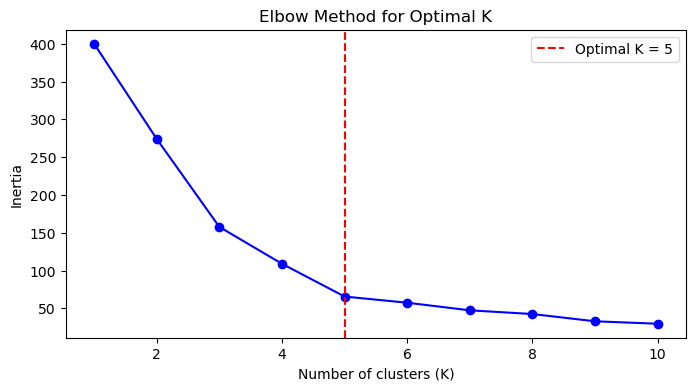

In [4]:
# 3. Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Find optimal K using kneed
knee = KneeLocator(K_range, inertia, curve="convex", direction="decreasing")
optimal_k = knee.elbow
print(f"Optimal K: {optimal_k}")

# 4. Visualize Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.legend()
plt.show()

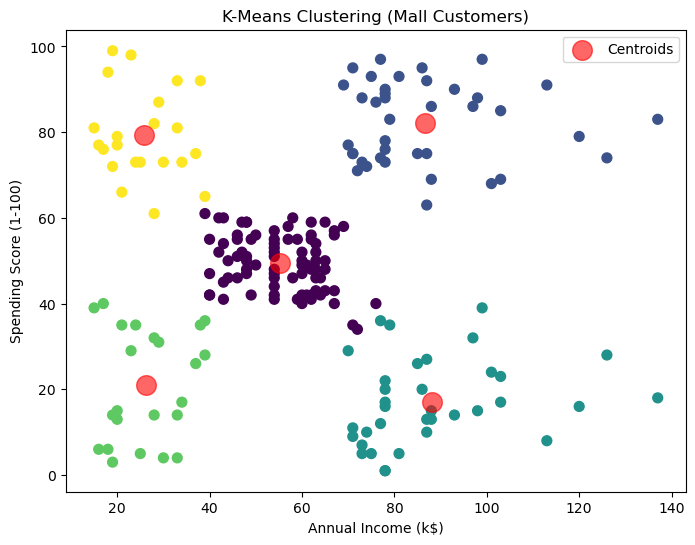

In [5]:
# 5. Refit KMeans with optimal K and evaluate with Silhouette Score
final_kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = final_kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=df['Cluster'], cmap='viridis', s=50)
centers = final_kmeans.cluster_centers_
centers_unscaled = scaler.inverse_transform(centers)
plt.scatter(centers_unscaled[:, 0], centers_unscaled[:, 1], c='red', s=200, alpha=0.6, label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering (Mall Customers)")
plt.legend()
plt.show()

In [6]:
# Evaluate using Silhouette Score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5547
